In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

# Zad 1.
Wygeneruj dane 2d oraz 3d w kształcie prostokąta (odpowiednio sześcianu) . Wykonaj PCA i narysuj wszystkie komponenty.

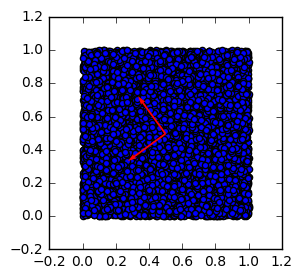

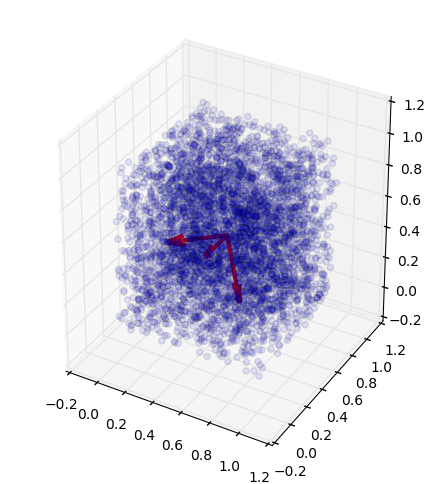

In [52]:
pca_2c = PCA(n_components=2)
pca_3c = PCA(n_components=3)

X_2d = np.random.rand(10000, 2)
X_3d = np.random.rand(5000, 3)

pca_2c.fit(X_2d)
pca_3c.fit(X_3d)

plt.figure(figsize=(3, 3))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.quiver(pca_2c.mean_[0], pca_2c.mean_[1], pca_2c.components_[:, 0], pca_2c.components_[:, 1], color='r', scale=5)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], alpha=0.1)
_ = ax.quiver(pca_3c.mean_[0], pca_3c.mean_[1], pca_3c.mean_[2], 
              pca_3c.components_[:, 0], pca_3c.components_[:, 1], pca_3c.components_[:, 2],
              length=0.4, color='r', linewidths=3, pivot='tail')

# Zad 2.
Dla danych z powyższego zadania wybierz jedną (lub dwie dla danych 3d) i narysuj dane po redukcji wymiarowości

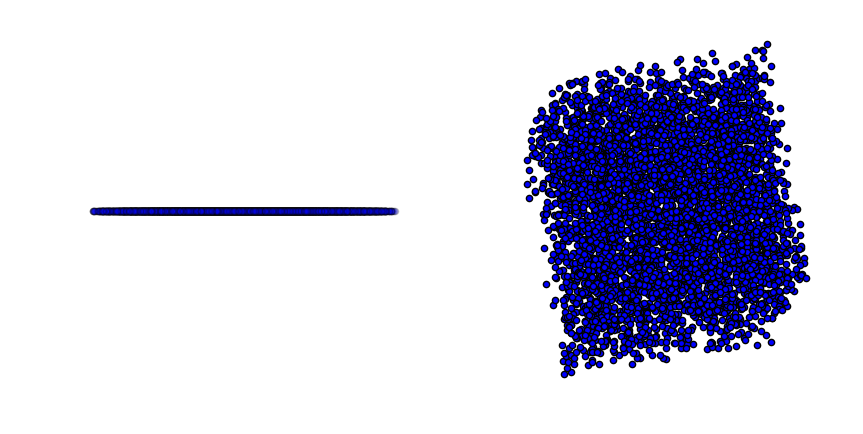

In [53]:
X_2d_reduced = PCA(n_components=1).fit_transform(X_2d)
X_3d_reduced = pca_2c.fit_transform(X_3d)

z = np.zeros(X_2d_reduced.shape[0])
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.axis('off')
plt.scatter(X_2d_reduced[:, 0], z, alpha=0.2)

plt.subplot(122)
plt.axis('off')
_ = plt.scatter(X_3d_reduced[:, 0], X_3d_reduced[:, 1])

# Zad 3.
Pobierz dawne dane (wymiaru więcej niż 5) z repozytorium UCI oraz wizualizuj je za pomocą PCA.

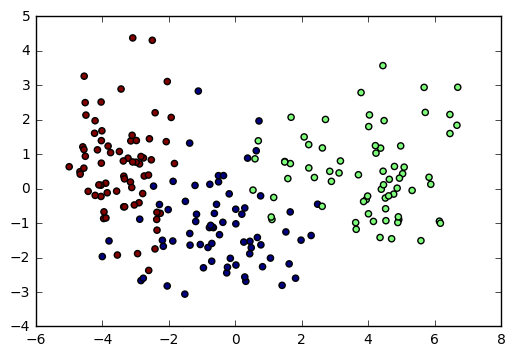

In [54]:
import urllib.request 
url = r"http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data)

X_seeds = dataset[:, :7]
y_seeds = dataset[:, 7]

pca = PCA(n_components=2)

X_seeds_red = pca.fit_transform(X_seeds)
_ = plt.scatter(X_seeds_red[:, 0], X_seeds_red[:, 1], c=y_seeds)

# Zad 4.
Ściągnij bazę twarzy handwritten digits wykonaj algorytm PCA (5 wymiarów).
Wykonaj grupowanie danych metodą k-means (k=9) na danych pełnego wymiaru oraz danych po algorytmie PCA wymiarach. Porównaj wyniki za pomocą miary Jaccard index.

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.cluster import KMeans
X_digits = digits.data
y_digits = digits.target

X_digits_reduced = PCA(n_components=5).fit_transform(X_digits)

# based on https://gist.github.com/ramhiser/c990481c387058f3cce7
import itertools
def jaccard_(labels1, labels2):
    n11 = n10 = n01 = 0
    n = labels1.shape[0]
    for i, j in itertools.combinations(range(n), 2):
        comembership1 = labels1[i] == labels1[j]
        comembership2 = labels2[i] == labels2[j]
        if comembership1 and comembership2:
            n11 += 1
        elif comembership1 and not comembership2:
            n10 += 1
        elif not comembership1 and comembership2:
            n01 += 1
    return float(n11) / (n11 + n10 + n01)

y_pred = KMeans(n_clusters=9).fit_predict(X_digits)
y_pred_pca = KMeans(n_clusters=9).fit_predict(X_digits_reduced)

print("before pca: ", jaccard_(y_digits, y_pred))
print("after pca: ", jaccard_(y_digits, y_pred_pca))

before pca:  0.4750643905360887
after pca:  0.41881922410604794


# Zad 5.
Zaimplementuj PCA samodzielnie ([link](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#principal-component-analysis-pca-vs-multiple-discriminant-analysis-mda)).
W tym zadaniu nie używaj wbudowanej funkcji PCA. Możesz używać funkcji, które występują w poszczególnych krokach PCA. 
Sprawdź działanie algorytmu na danych 3d redukując wymiarowość do 2d.

* Computing the d-dimensional mean vector
* Computing the Covariance Matrix
* Computing eigenvectors and corresponding eigenvalues
* Visualizing the eigenvectors
* Sorting the eigenvectors by decreasing eigenvalues
* Choosing k eigenvectors with the largest eigenvalues
* Transforming the samples onto the new subspace

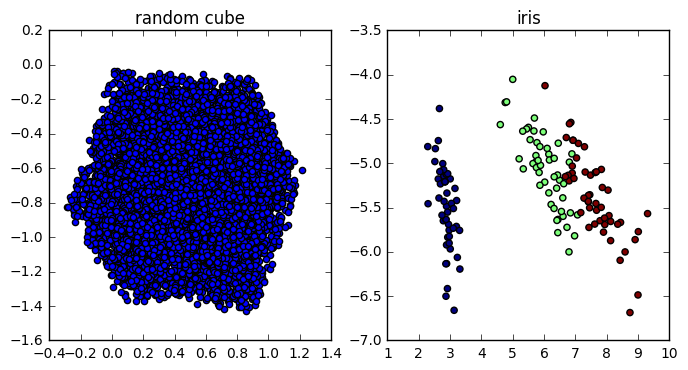

In [69]:
class PCA_(object):
    
    def __init__(self, n_components):
        self.mean = None
        self.cov = None
        self.W = None
        self.n_components = n_components

    def fit_transform(self, X):
        # compute mean
        self.mean = np.mean(X, axis=0)
        # compute covariance matrix from data
        self.cov = np.cov(X.T)
        # compute eigenvectors from covariance matrix
        w, v = np.linalg.eig(self.cov.T)
        # sort eigenvectors by eigenvalues
        idx = w.argsort()[::-1]
        w = w[idx]
        v = v[:, idx]
        # compute projection matrix
        self.W = v[:, :self.n_components]
        # return data projected onto subspace
        return np.dot(X, self.W)

pca = PCA_(2)

X = np.random.rand(10000, 3)
X_ = pca.fit_transform(X)

plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("random cube")
plt.scatter(X_[:, 0], X_[:, 1])

from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
X_iris_ = pca.fit_transform(X_iris)

plt.subplot(122)
plt.title("iris")
_ = plt.scatter(X_iris_[:, 0], X_iris_[:, 1], c=y_iris)